* 글로브(Global Vectors for Word Representation, GloVe)는 카운트 기반과 예측 기반을 모두 사용하는 방법론으로 2014년에 미국 스탠포드대학에서 개발한 단어 임베딩 방법론
* 기존의 카운트 기반의 LSA(Latent Semantic Analysis)와 예측 기반의 Word2Vec의 단점을 지적하며 이를 보완한다는 목적으로 나왔고, 실제로도 Word2Vec만큼 뛰어난 성능을 보여준다.

## 1. 기존 방법론에 대한 비판
#### LSA
DTM이나 TF-IDF 행렬과 같이 각 문서에서의 각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력으로 받아 차원을 축소(Truncated SVD)하여 잠재된 의미를 끌어내는 방법론
* 단어 의미의 유추 작업(Analogy task)에는 성능이 떨어진다.

#### Word2Vec
실제값과 예측값에 대한 오차를 손실 함수를 통해 줄여나가며 학습하는 예측 기반의 방법론
* 예측 기반으로 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보를 반영하지 못한다.

## 2. 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)
단어의 동시 등장 행렬은 행과 열을 전체 단어 집합의 단어들로 구성하고, i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬
* 전치(Transpose)해도 동일한 행렬이 된다.

## 3. 동시 등장 확률(Co-occurrence Probability)
동시 등장 확률 P(k|i)는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률

i를 중심 단어(Center Word), k를 주변 단어(Context Word)라고 했을 때, 위에서 배운 동시 등장 행렬에서 중심 단어 i의 행의 모든 값을 더한 값을 분모로 하고 i행 k열의 값을 분자로 한 값

## 4. 손실 함수(Loss function)
GloVe => **임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것**

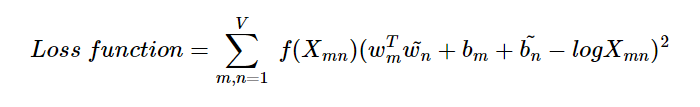

In [ ]:
from IPython.display import Image
Image('./data/GloVe의 손실함수.png')

## 5. GloVe 훈련시키기

In [4]:
# GloVe 패키지 설치
!pip install glove_python_binary

     |████████████████████████████████| 952kB 22.8MB/s 


In [11]:
# 훈련 데이터 다운로드 및 전처리
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [12]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7ff0448cb490>)

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
# 데이터 전처리


targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF-8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)
    
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [16]:
from glove import Corpus, Glove

In [17]:
from glove import Corpus, Glove

corpus = Corpus()
corpus.fit(result, window=5)
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [18]:
model_result1 = glove.most_similar("man")
print(model_result1)

[('woman', 0.9607936581467619), ('guy', 0.8944430991280592), ('girl', 0.8831745511473558), ('kid', 0.8484350374682453)]


In [20]:
model_result2 = glove.most_similar("boy")
print(model_result2)

[('girl', 0.9330520950170924), ('woman', 0.8500427703721327), ('man', 0.8432977343113408), ('kid', 0.8332595892112515)]


In [21]:
model_result3=glove.most_similar("university")
print(model_result3)

[('harvard', 0.8970216908939616), ('mit', 0.8588344990915101), ('stanford', 0.8516557007373708), ('cambridge', 0.8493410271622306)]


In [22]:
model_result4=glove.most_similar("water")
print(model_result4)

[('fresh', 0.8365295899298328), ('air', 0.8298794660177939), ('clean', 0.8271233429653522), ('food', 0.8213327327132649)]


In [23]:
model_result6=glove.most_similar("muscle")
print(model_result6)

[('tissue', 0.8513285062255818), ('nerve', 0.8135564542087738), ('channel', 0.766023235986595), ('bone', 0.7592830619274231)]
